## Let's take a look at Delta's incredible cancellation reduction between 2010-2018

In [1]:
# Import libraries and set max columns and rows for pandas
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import glob


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read data that was downloaded from https://www.transtats.bts.gov/DataIndex.asp Airline On-Time Performance Data for Jan-2010 through Dec-2018 one month at a time

### Convert FlightDate to datetime type

### Select subset of fields needed for analysis - Year, Month, Reporting_Airline, FlightDate, Flights, DepDelay, ArrDelay, ArrDel15, Cancelled, CancellationCode

### Using the glob function to concat data into a single dataframe covering the entire time period

In [2]:
# Get a list of all CSV files in the current directory
csv_files = glob.glob("*.csv")

# Empty list to store the dataframes
dfs = []

# Loop through CSV files and read only certain columns into the dataframe, convert FlightDate to datetime, and append it to the list
for filename in csv_files:
    df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled", "CancellationCode"])
    df["FlightDate"] = pd.to_datetime(df["FlightDate"])
    df = df.loc[df['Reporting_Airline'] == 'DL']
    dfs.append(df)

# Concat all the dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled", "CancellationCode"])
C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled", "CancellationCode"])
C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled"

C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled", "CancellationCode"])
C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled", "CancellationCode"])
C:\Users\Family PC\AppData\Local\Temp\ipykernel_7552\2593063291.py:9: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, usecols=["Year", "Month","Reporting_Airline", "FlightDate", "Flights", "DepDelay", "ArrDelay", "ArrDel15", "Cancelled"

In [3]:
# checking out data types to determine if conversions are needed
df.dtypes

Year                          int64
Month                         int64
FlightDate           datetime64[ns]
Reporting_Airline            object
DepDelay                    float64
ArrDelay                    float64
ArrDel15                    float64
Cancelled                   float64
CancellationCode             object
Flights                     float64
dtype: object

In [4]:
# look at the shape of the df
df.shape

(7418698, 10)

In [5]:
# quick look at a sample of the data in the df
df.head()

,Year,Month,FlightDate,Reporting_Airline,DepDelay,ArrDelay,ArrDel15,Cancelled,CancellationCode,Flights
0,2010,1,2010-01-01,DL,-5.0,6.0,0.0,0.0,NaN,1.0
1,2010,1,2010-01-01,DL,-7.0,-24.0,0.0,0.0,NaN,1.0
2,2010,1,2010-01-01,DL,7.0,-23.0,0.0,0.0,NaN,1.0
3,2010,1,2010-01-01,DL,16.0,-9.0,0.0,0.0,NaN,1.0
4,2010,1,2010-01-01,DL,4.0,-11.0,0.0,0.0,NaN,1.0


In [6]:
# take a look at cancellation counts by month and year
pivot_df = df.pivot_table(index='Year', columns='Month', values='Cancelled', aggfunc='sum')

print(pivot_df)

Month      1       2      3       4      5       6       7       8       9   \
Year                                                                          
2010   1166.0  3082.0  922.0   327.0  688.0  1173.0  1750.0  1062.0   558.0   
2011   3756.0  1794.0  505.0   634.0  357.0   679.0   635.0  1242.0   173.0   
2012    344.0   120.0  138.0   107.0  149.0   236.0   363.0   430.0   115.0   
2013    293.0   536.0  483.0    84.0   50.0   278.0   312.0    51.0    49.0   
2014   2997.0  2556.0  156.0    40.0   72.0    19.0   139.0   297.0   129.0   
2015    678.0  1696.0  524.0   147.0  143.0   239.0   106.0    69.0     6.0   
2016    974.0   313.0   58.0    53.0   39.0    13.0   241.0  1807.0    10.0   
2017    782.0   356.0  439.0  3151.0   56.0    93.0    36.0   191.0  1705.0   
2018   1539.0    70.0  869.0   268.0   23.0   131.0   128.0   156.0   112.0   

Month      10     11      12  
Year                          
2010    644.0  611.0  2874.0  
2011    182.0  118.0   113.0  
2012  

# Let's now look at a heatmap of 4+ hour delays and cancellations by month over this time period. Note the seasonality with April, May, September, October, and November being the best reliability months due to lighter flight schedules and more favorable weather.

## There seems to have been a tradeoff made between cancellations and long delays.

### 2010 was a particularly bad operational performance year for Delta due to its integration with the Northwest Airlines network and increased fleet complexity and associated issues, particularly during the typical dense schedule during summer months.  

### April 2017 was a difficult month as described in this article: https://www.cnn.com/2017/04/07/business/storms-delta-cancellations/index.html

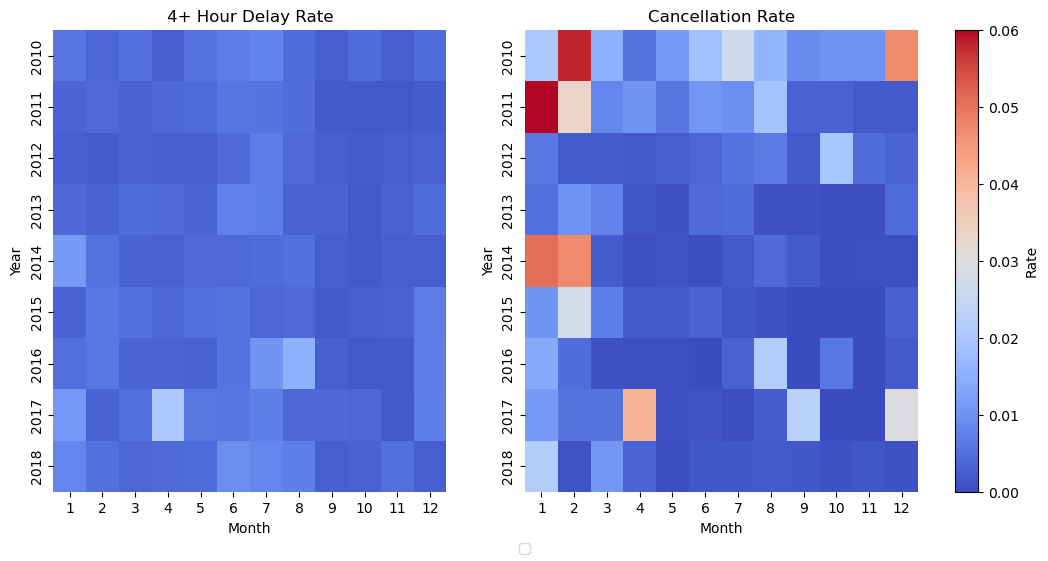

In [7]:
# create a new df that includes scheduled flights with DepDelay >= 240 or Cancelled == 1
delayed_flights = df[(df['DepDelay'] >= 240) | (df['Cancelled'] == 1)]

# create a pivot table with counts of delayed and cancelled flights by year and month
delay_counts = delayed_flights.pivot_table(index='Year', columns='Month', values='DepDelay', aggfunc='count')
cancel_counts = delayed_flights.pivot_table(index='Year', columns='Month', values='Cancelled', aggfunc='sum')

# create a pivot table with total scheduled flights by year and month
total_flights = df.pivot_table(index='Year', columns='Month', values='Flights', aggfunc='sum')

# create a df with delayed and cancelled flights per total scheduled flights metric
delay_rate = delay_counts / total_flights
cancel_rate = cancel_counts / total_flights

# create two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create a heatmap of the 4+ hour delay rate
sns.heatmap(delay_rate, cmap='coolwarm', ax=ax1, vmin=0, vmax=0.06, cbar=False)
ax1.set_title('4+ Hour Delay Rate')

# create a heatmap of the cancellation rate
sns.heatmap(cancel_rate, cmap='coolwarm', ax=ax2, vmin=0, vmax=0.06, cbar=False)
ax2.set_title('Cancellation Rate')

# create a color bar for the entire figure
cbar = fig.colorbar(ax1.collections[0], ax=[ax1, ax2], fraction=0.03, pad=0.04)
cbar.set_label('Rate')

# create a legend for the entire figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels))

plt.show()

# If Flights with Departure Delays of 4+ hours were counted the same as a cancellation, here is what the cancellation rate would look like.

### This view shows the trade off between long delays and cancellations.  Earlier years tend to favor cancellations more than later years during the time period.

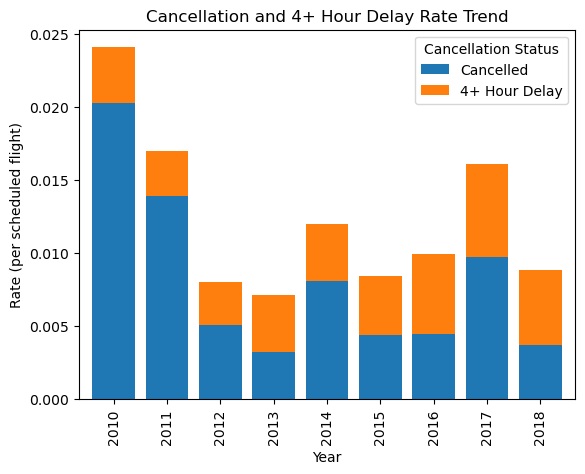

In [8]:
# create a new df that includes scheduled flights with DepDelay >= 240 or Cancelled == 1
delayed_flights = df[(df['DepDelay'] >= 240) | (df['Cancelled'] == 1)]

# create a pivot table with total flights by year
total_flights = df.pivot_table(index='Year', values='Flights', aggfunc='sum')

# create a pivot table with delayed flights by year and cancellation status
delayed_by_year_and_cancelled = delayed_flights.pivot_table(index='Year', columns='Cancelled', values='Flights', aggfunc='sum')

# merge delayed and total flights by year
merged_df = total_flights.merge(delayed_by_year_and_cancelled, on='Year')

# calculate cancellation and 4+ hour delay rates per flight
merged_df['Cancelled_Rate'] = merged_df[1] / merged_df['Flights']
merged_df['Delayed_Rate'] = merged_df[0] / merged_df['Flights']

# create a stacked bar chart
merged_df[['Cancelled_Rate', 'Delayed_Rate']].plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation and 4+ Hour Delay Rate Trend')
plt.ylabel('Rate (per scheduled flight)')
plt.legend(title='Cancellation Status', labels=['Cancelled', '4+ Hour Delay'])
plt.show()


## The higher proportion of long delays didn't seem to happen at one time although airline operations have massive variability that make it difficult to detect. 

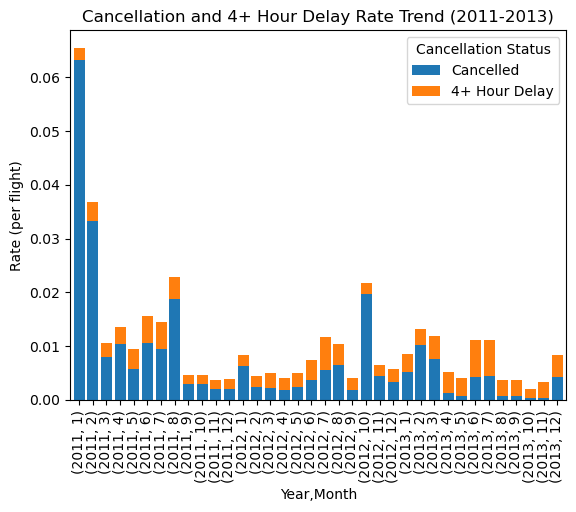

In [16]:
# filter flights for years 2012 and 2013 and with DepDelay >= 240 or Cancelled == 1
delayed_flights2 = df[((df['Year'] == 2011) | (df['Year'] == 2012) | (df['Year'] == 2013)) & ((df['DepDelay'] >= 240) | (df['Cancelled'] == 1))]

# create a pivot table with total flights by year and month
total_flights2 = df[df['Year'].isin([2011, 2012, 2013])].pivot_table(index=['Year', 'Month'], values='Flights', aggfunc='sum')

# create a pivot table with delayed flights by year, month and cancellation status
delayed_by_year_month_and_cancelled = delayed_flights2.pivot_table(index=['Year', 'Month'], columns='Cancelled', values='Flights', aggfunc='sum')

# merge delayed and total flights by year and month
merged_df2 = total_flights2.merge(delayed_by_year_month_and_cancelled, on=['Year', 'Month'])

# calculate cancellation and 4+ hour delay rates per scheduled flight
merged_df2['Cancelled_Rate'] = merged_df2[1] / merged_df2['Flights']
merged_df2['Delayed_Rate'] = merged_df2[0] / merged_df2['Flights']

# create a stacked bar chart
merged_df2[['Cancelled_Rate', 'Delayed_Rate']].plot(kind='bar', stacked=True, width=0.8)
plt.title('Cancellation and 4+ Hour Delay Rate Trend (2011-2013)')
plt.ylabel('Rate (per flight)')
plt.legend(title='Cancellation Status', labels=['Cancelled', '4+ Hour Delay'])
plt.show()


## Here's a look at a single month (March) during the time period to see if it becomes more apparent. 

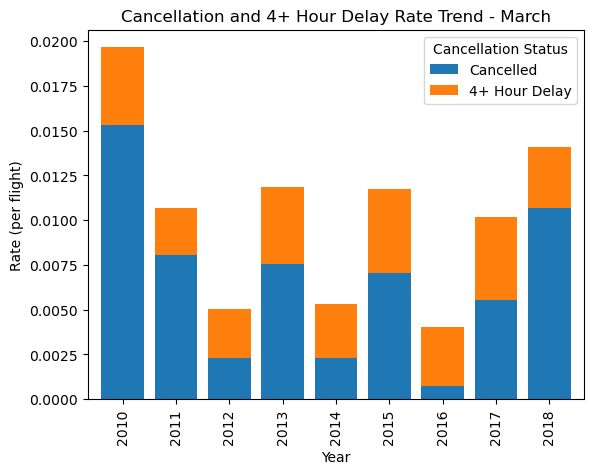

In [15]:
# create a new df that includes flights with DepDelay >= 240 or Cancelled == 1 for years 2010-2018 pertaining to March
delayed_flights3 = df[((df['Year'] >= 2010) & (df['Year'] <= 2018)) & ((df['DepDelay'] >= 240) | (df['Cancelled'] == 1)) & (df['Month'] == 3)]

# create a pivot table with total flights by year and March 
total_flights3 = df[(df['Year'] >= 2010) & (df['Year'] <= 2018) & (df['Month'] == 3)].pivot_table(index='Year', values='Flights', aggfunc='sum')

# create a pivot table with delayed flights by year and cancellation status
delayed_by_year_and_cancelled2 = delayed_flights3.pivot_table(index='Year', columns='Cancelled', values='Flights', aggfunc='sum')

# merge delayed and total flights by year
merged_df3 = total_flights3.merge(delayed_by_year_and_cancelled2, on='Year')

# calculate cancellation and 4+ hour delay rates per flight
merged_df3['Cancelled_Rate'] = merged_df3[1] / merged_df3['Flights']
merged_df3['Delayed_Rate'] = merged_df3[0] / merged_df3['Flights']

# create a stacked bar chart for each March between 2010 and 2018
ax = merged_df3[['Cancelled_Rate', 'Delayed_Rate']].plot(kind='bar', stacked=True, width=0.8)
ax.set_xticklabels(range(2010, 2019))
ax.set_title('Cancellation and 4+ Hour Delay Rate Trend - March')
ax.set_ylabel('Rate (per flight)')
ax.legend(title='Cancellation Status', labels=['Cancelled', '4+ Hour Delay'])
plt.show()
